سهند نوعی 9923087

https://colab.research.google.com/drive/1AgVllIaBZzXclpIM_QmpoTvlkPKYjjB-#scrollTo=dgXWBTXpggBW

<div dir=rtl>
<font color='red' size="6">آماده سازی نوت بوک</font>
<div dir=rtl>

><font size = "4"> 1.  قبل از هر کاری، با استفاده از مسیر نوشته شده در خط پایین، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.



<div dir=ltr>
<font size = "4" color='green'>
File --> Save a copy in Drive
</font>
<div dir=rtl>

><font size = "4"> 2.   برای دسترسی به تصاویر مورد نیاز در این تکلیف، بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید. با این کار فایل های مربوط به تکلیف (تصاویر) دانلود و در فولدر کولب شما قرار داده می شوند. انجام این مرحله پس از هر بار قطع شدن از کولب و اتصال دوباره، ضروری است. یعنی اگر مثلا یک سوال را حل کردید و بعد کولب را بستید یا مدتی با آن کار نکردید و اتصالتان به طور خودکار قطع شد، در اقدام بعدیتان برای نوشتن بقیه‌ی تمرین، حتما این بلوک باید دوباره اجرا شود.

In [5]:
#@title RUN THIS BLOCK WITHOUT ANY CHANGE to download the data
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW' -O 'HW4_data.zip'
!unzip HW4_data.zip

--2024-01-25 02:34:53--  https://drive.google.com/uc?export=download&id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW
Resolving drive.google.com (drive.google.com)... 74.125.31.113, 74.125.31.139, 74.125.31.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.31.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW&export=download [following]
--2024-01-25 02:34:53--  https://drive.usercontent.google.com/download?id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... ^C
Archive:  HW4_data.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-pa

# Imports
<div dir=rtl>
<font color="green" size="6">فراخوانی کتابخانه ها</font>
<div dir=rtl>




In [6]:
###
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
###

# Any Helper Functions

<div dir=rtl>
<font color="green" size = "4">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید (همه در همین بلوک).</font>
</div>



In [7]:
###
def show(image, title):
    max_intensity = np.max(image)
    min_intensity = np.min(image)
    plt.title(title, color="blue")
    plt.imshow(image, cmap="gray", vmin=min_intensity, vmax=max_intensity)
    plt.axis("off")
    plt.show()


def show_plots(images_list, titles_list, rows=1):
    columns = len(images_list)
    fig, axes = plt.subplots(rows, columns, figsize=(20, 20))
    for i in range(columns):
        if rows == 1:
            axes[i].imshow(images_list[i], cmap="gray", vmin=np.min(images_list[i]), vmax=np.max(images_list[i]))
            axes[i].set_title(titles_list[i], color="blue")
            axes[i].axis("off")
        if rows >= 2:
            axes[0, i].imshow(images_list[i], cmap="gray", vmin=np.min(images_list[i]), vmax=np.max(images_list[i]))
            axes[0, i].set_title(titles_list[i], color="blue")
            axes[0, i].axis("off")

            bin_num = (np.max(images_list[i]) - np.min(images_list[i]) + 1) / 4
            bin_num = int(np.ceil(bin_num))
            hist, bins = np.histogram(images_list[i], bins=bin_num, range=(np.min(images_list[i]), np.max(images_list[i])))
            axes[1, i].bar(bins[:-1], hist)
    plt.show()

###

# Question 5: Edge Detection (15%)

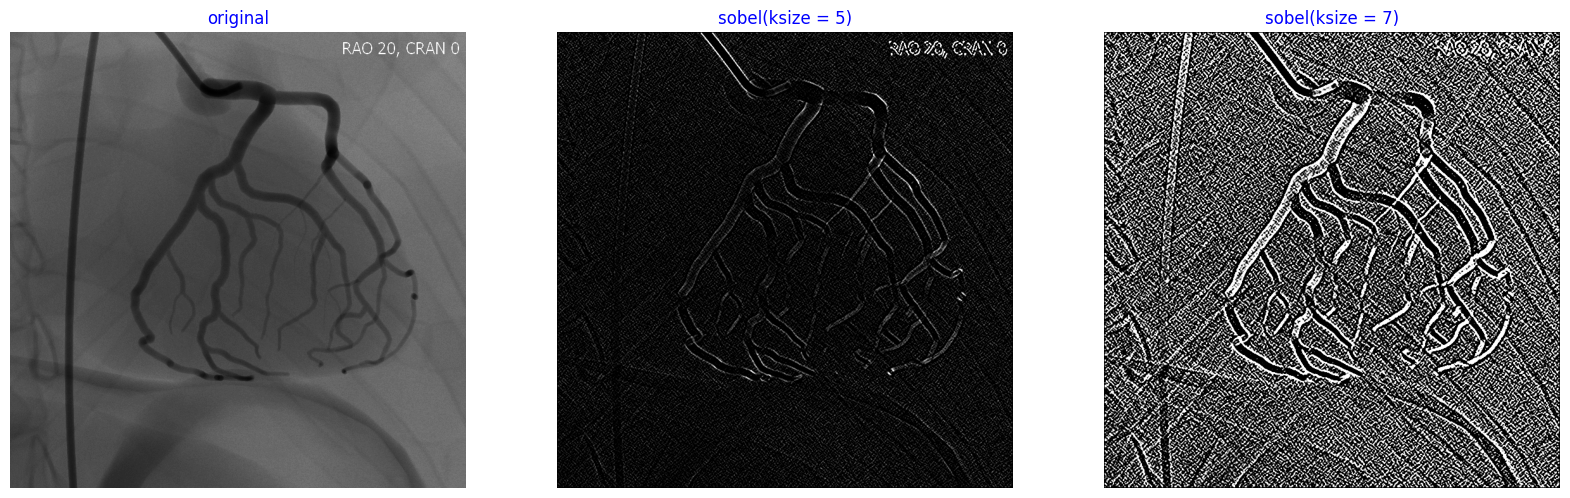

In [8]:
#@title Q5 - Part 1 (Sobel) (5%)
###
angio = cv.imread("angio.png", cv.IMREAD_GRAYSCALE)
# print(angio.dtype)
sobel = cv.Sobel(angio, ddepth=-1, dx=1, dy=1, ksize=5)
sobel2 = cv.Sobel(angio, ddepth=-1, dx=1, dy=1, ksize=7)
show_plots([angio, sobel, sobel2], ["original", "sobel(ksize = 5)", "sobel(ksize = 7)"])
###

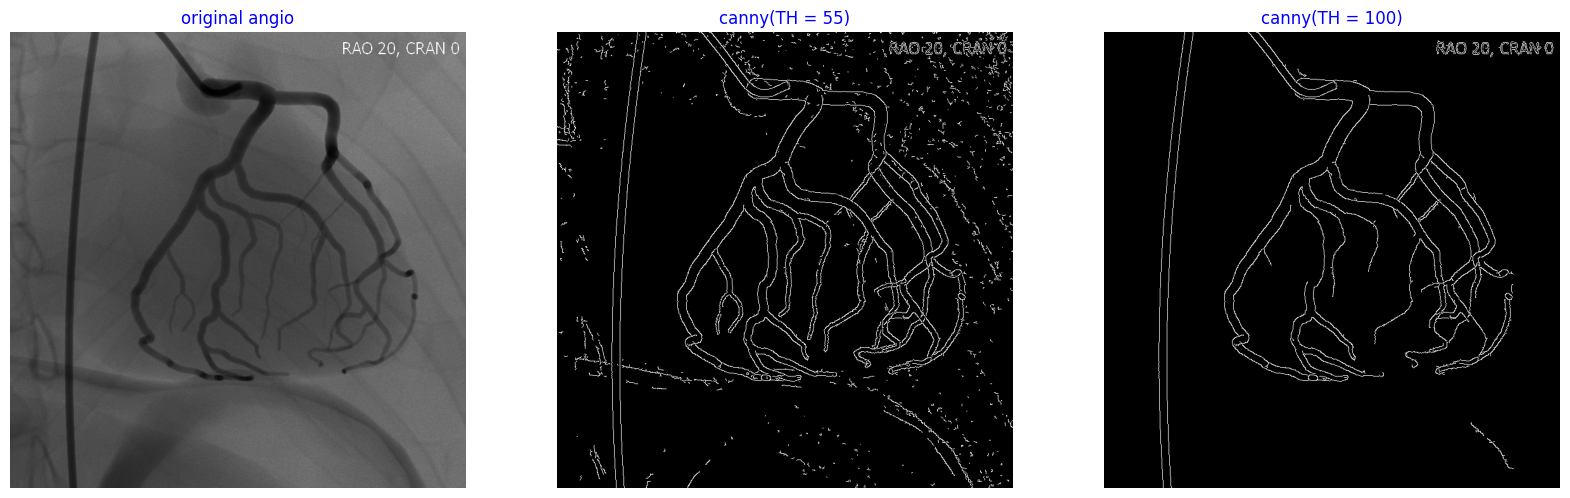

In [9]:
#@title Q5 - Part 2 (Canny) (5%)
###
th1 = 55
th2 = 100
canny = cv.Canny(angio, 30, th1)
canny2 = cv.Canny(angio, 30, th2)
show_plots([angio, canny, canny2], ["original angio", f"canny(TH = {th1})", f"canny(TH = {th2})"])
###

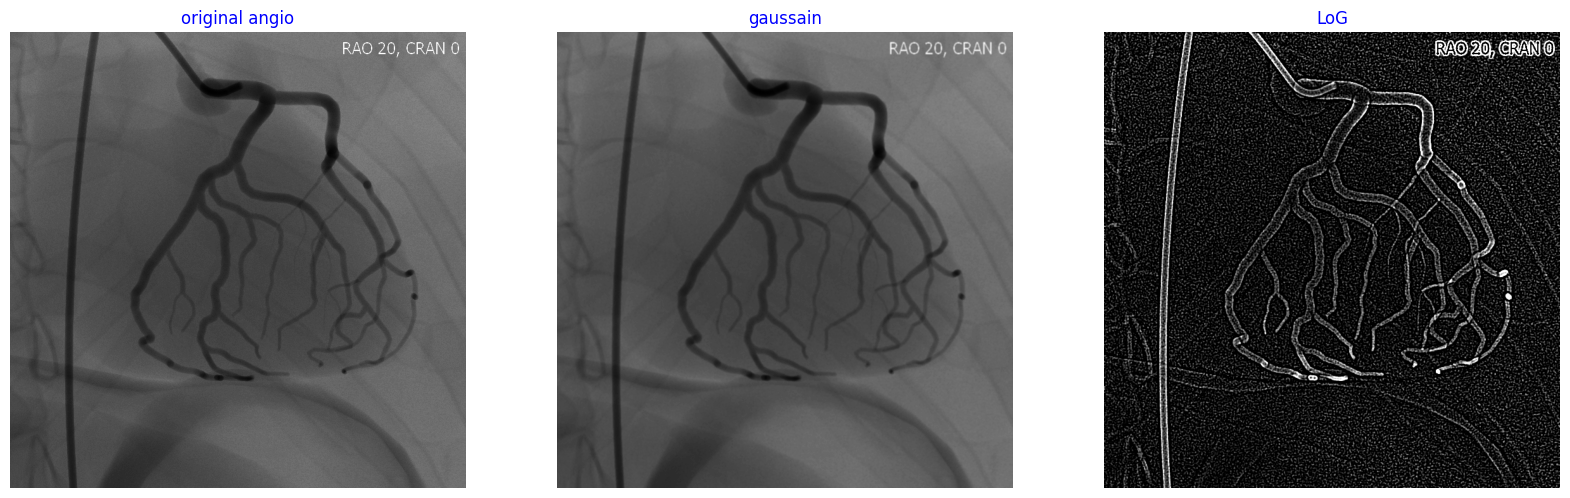

In [10]:
#@title Q5 - Part 3 (LoG) (5%)
###
gaussian = cv.GaussianBlur(angio, ksize=(3, 3), sigmaX=1)
laplacian_of_gaussian = cv.Laplacian(gaussian, ksize=5, ddepth=-1)
show_plots([angio, gaussian, laplacian_of_gaussian], ["original angio", "gaussain", "LoG"])
###

# Question 6: Hough Transform (15%)

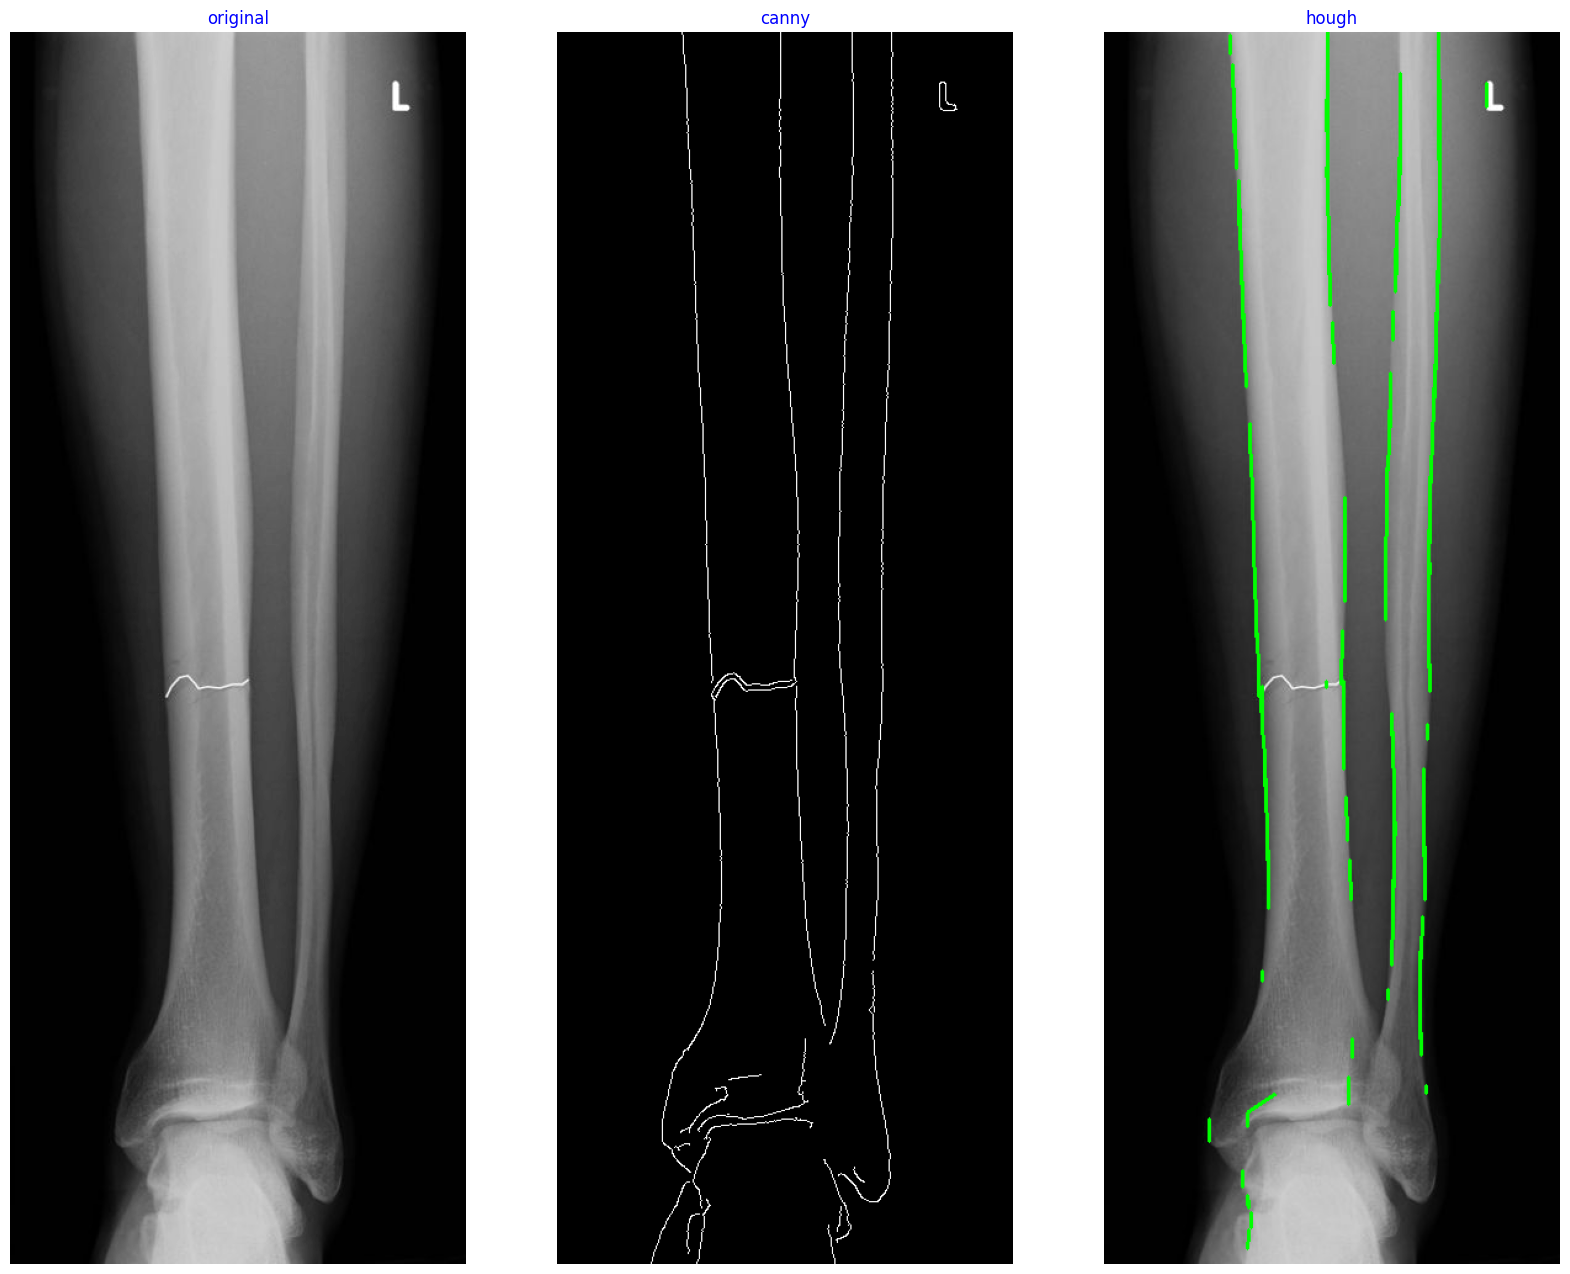

In [11]:
#@title Q6 - Part 1 (60%)
###
bone = cv.imread("bone.jpg", cv.IMREAD_GRAYSCALE)
hough_bone = cv.cvtColor(bone,cv.COLOR_GRAY2BGR)
bone_gaussian = cv.GaussianBlur(bone, ksize=(5, 5), sigmaX=2.5)
bone_canny = cv.Canny(bone_gaussian, 30, 80)
lines = cv.HoughLinesP(bone_canny, rho=1, theta=1, threshold=20, minLineLength=5, maxLineGap=10)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(hough_bone, (x1, y1), (x2, y2), (0, 255, 0), 2)
show_plots([bone, bone_canny, hough_bone], ["original", "canny", "hough"])
###

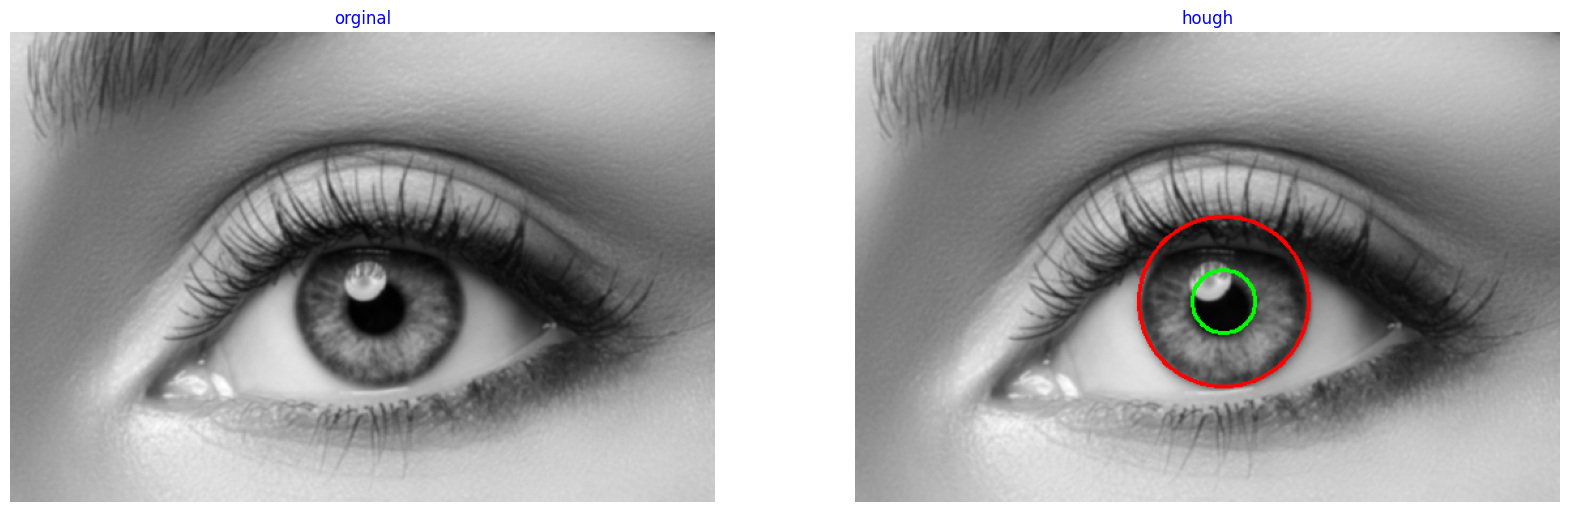

In [12]:
#@title Q6 - Part 2 (40%)
###
eye = cv.imread("eye.jpg", cv.IMREAD_GRAYSCALE)
eye = cv.GaussianBlur(eye, ksize=(7, 7), sigmaX=1)
circles = cv.HoughCircles(eye, cv.HOUGH_GRADIENT, 1, 1, param2=99)
circles = np.uint16(np.around(circles))
hough_circles = cv.cvtColor(eye,cv.COLOR_GRAY2BGR)
# print(circles)
for i in circles[0]:
    cv.circle(hough_circles, (i[0], i[1]), i[2], (255, 0, 0), 2)
    cv.circle(hough_circles, (i[0], i[1]), 24, (0, 255, 0), 2)

show_plots([eye, hough_circles], ["orginal", "hough"])
###

# Question 7: Feature-Based Registration (20%)

In [13]:
###
# mrif = cv.imread("MRIF.png", cv.IMREAD_GRAYSCALE)
# mris = cv.imread("MRIS.png", cv.IMREAD_GRAYSCALE)
# show_plots([mrif, mris], ["MRIF", "MRIS"])

# %matplotlib notebook
# from matplotlib.backend_bases import MouseButton
# import matplotlib.colors as mcolors
# import ipywidgets as wdg

# colors = list(mcolors.BASE_COLORS.keys())
# fig, ax = plt.subplots(1, 2)
# fig.tight_layout()
# pic1_points = []
# pic2_points = []
# ax[0].imshow(mrif, cmap='gray')
# ax[1].imshow(mris, cmap='gray')
# txt = wdg.Textarea(
#  value='',
#  placeholder='',
#  description='event:',
#  disabled=False
# )
# display(txt)

# def on_click(event):
#      if event.button is MouseButton.LEFT:
#          axs = event.inaxes

#          x, y = int(event.xdata), int(event.ydata)

#          if axs == ax[0] and len(pic1_points) < num_points:
#              pic1_points.append([x, y])
#              axs.scatter(x, y, marker="x", color=colors[len(pic1_points)-1], s=200)
#          elif axs == ax[1] and len(pic2_points) < num_points:
#              pic2_points.append([x, y])
#              axs.scatter(x, y, marker="x", color=colors[len(pic2_points)-1], s=200)
#          else:
#              txt.value = 'It is enough. go to the next section.'
# plt.connect('button_press_event', on_click)
# plt.show()

###

# Question 8: Similarity-based Segmentation (20%)

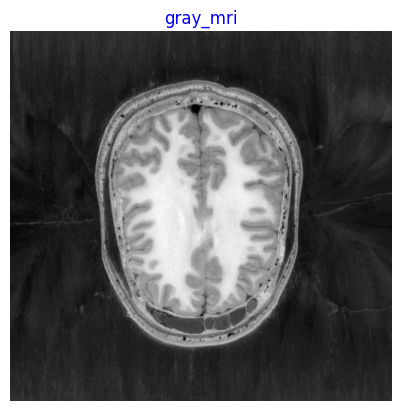

In [14]:
#@title Q8 - Part 1
###
gray_mri = cv.imread("/content/Color_MRI.png", cv.IMREAD_GRAYSCALE)
show(gray_mri, "gray_mri")
###

206
118


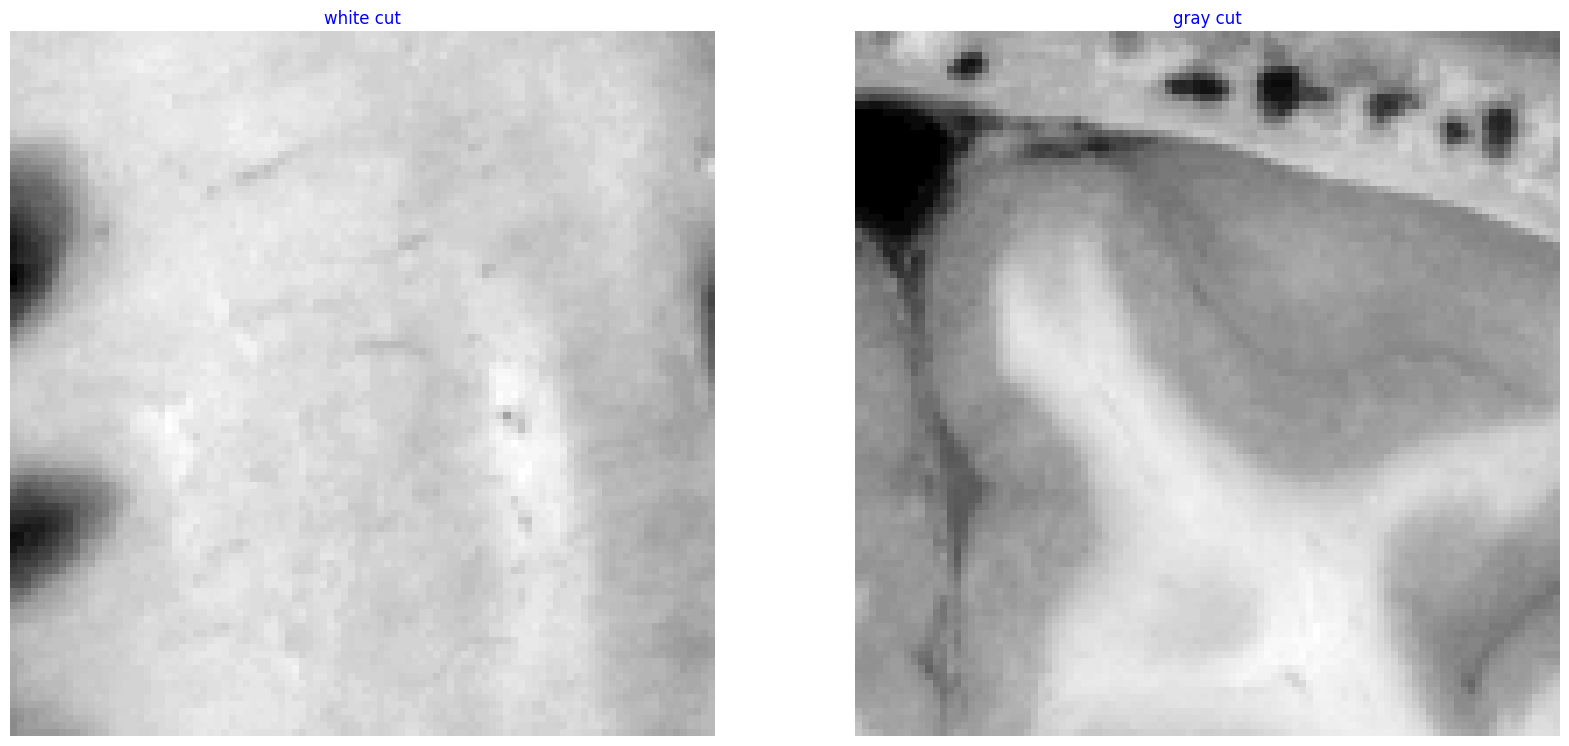

In [15]:
#@title Q8 - Part 2
###
white_cut = gray_mri[350:450, 300:400]

white_seed = (400, 350)
print(gray_mri[white_seed])

gray_cut = gray_mri[150:250, 400:500]
gray_seed = (175, 450)
print(gray_mri[gray_seed])

show_plots([white_cut, gray_cut], ["white cut", "gray cut"])
###

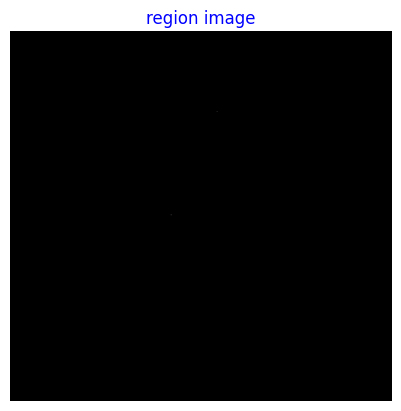

In [16]:
#@title Q8 - Part 3 (5%)
###
region_image = np.zeros(gray_mri.shape, dtype=np.uint8)
region_image[white_seed] = 245
region_image[gray_seed] = 170
show(region_image, "region image")
###

In [17]:
#@title Q8 - Part 4 (50%)
###
def region_growing(max_distance, threshold_type, seed, kernel, region_image, base_image, iteration=1):
    seed_value = base_image[seed]
    seed_region = region_image[seed]

    ## find the threshold
    threshold = 0
    if threshold_type == 'constant':
        threshold = seed_value
    elif threshold_type == 'variable':
        total = 0
        count = 0
        for i in range(region_image.shape[0]):
            for j in range(region_image.shape[1]):
                if region_image[i, j] == seed_region:
                    total += base_image[i, j]
                    count += 1
        threshold = total / count

    ## select current region pixels
    region_separated = np.zeros(region_image.shape, dtype=np.uint8)
    for i in range(region_image.shape[0]):
        for j in range(region_image.shape[1]):
            if region_image[i, j] == seed_region:
                region_separated[i, j] = 255

    ## find candidate pixels for the current region
    region_expanded = cv.morphologyEx(region_separated, cv.MORPH_DILATE, kernel, iterations=iteration)
    region_candidates = region_expanded - region_separated

    ## see if any of the candidates belong to the current region
    for i in range(region_candidates.shape[0]):
        for j in range(region_candidates.shape[1]):
            if region_candidates[i, j] > 0:
                original_intensity = base_image[i, j]
                if abs(int(original_intensity) - int(threshold)) <= max_distance:
                    region_candidates[i, j] = seed_region
                else:
                    region_candidates[i, j] = 0

    ## true if the current region has changed
    is_changed = np.sum(region_candidates) != 0

    ## produce the final array of regions
    region_image += region_candidates

    return is_changed, region_image
###

True


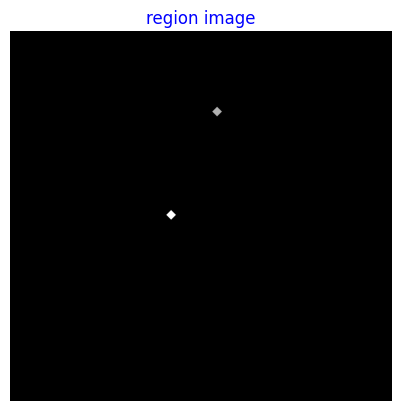

In [18]:
#@title Q8 - Part 5 (15%)
###
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)
is_changed, region_image = region_growing(50, 'constant', white_seed, kernel, region_image, gray_mri, 10)
is_changed, region_image = region_growing(50, 'constant', gray_seed, kernel, region_image, gray_mri, 10)
print(is_changed)
show(region_image, "region image")
###

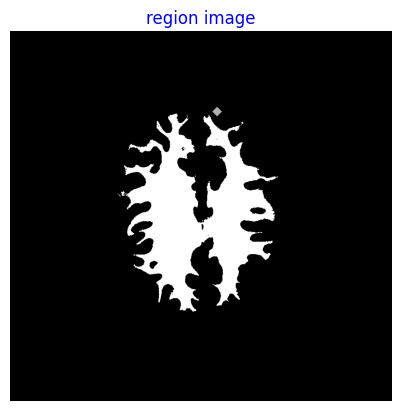

100
200


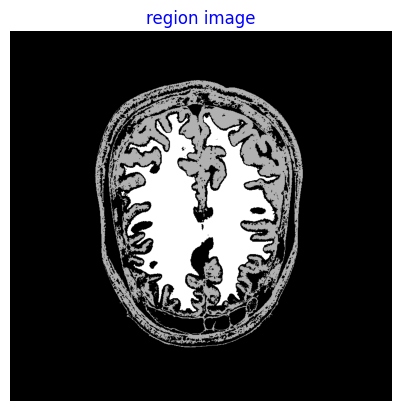

iterations for constant threshold: 260


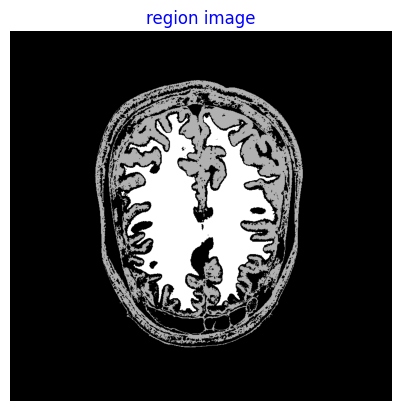

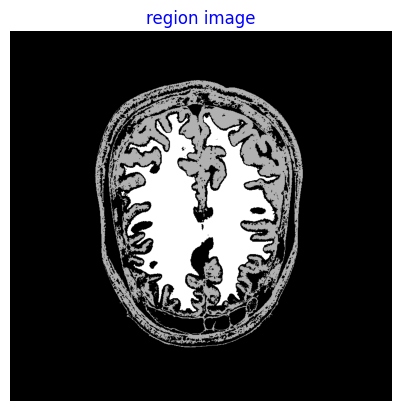

iterations for variable threshold: 0


In [19]:
#@title Q8 - Part 6 (10%)
###
i = 0
while True:
    is_changed, region_image = region_growing(40, 'constant', white_seed, kernel, region_image, gray_mri, 5)
    if not is_changed:
        break
    i += 1
    if i % 100 == 0:
        print(i)

show(region_image, "region image")
white_constant = np.array(region_image)
while True:
    is_changed, region_image = region_growing(20, 'constant', gray_seed, kernel, region_image, gray_mri, 5)
    if not is_changed:
        break
    i += 1
    if i % 100 == 0:
        print(i)

show(region_image, "region image")
total_constant = np.array(region_image)
print(f'iterations for constant threshold: {i}')

i = 0
while True:
    is_changed, region_image = region_growing(25, 'variable', white_seed, kernel, region_image, gray_mri, 5)
    if not is_changed:
        break
    i += 1
    if i % 100 == 0:
        print(i)

show(region_image, "region image")

white_variable = np.array(region_image)
while True:
    is_changed, region_image = region_growing(15, 'variable', gray_seed, kernel, region_image, gray_mri, 5)
    if not is_changed:
        break
    i += 1
    if i % 100 == 0:
        print(i)

show(region_image, "region image")
total_variable = np.array(region_image)
print(f'iterations for variable threshold: {i}')
###

In [20]:
#@title Q8 - Part 7 (5%)
###
#تصویر مربوط به سطح آستانه ثابت، به 260 تکرار و تصویر مربوط به سطح آستانه متغیر به تکرار نیاز نداشت. در هر کدام از این تکرار‌ها عملیات dilate پنج بار انجام شده است.

###

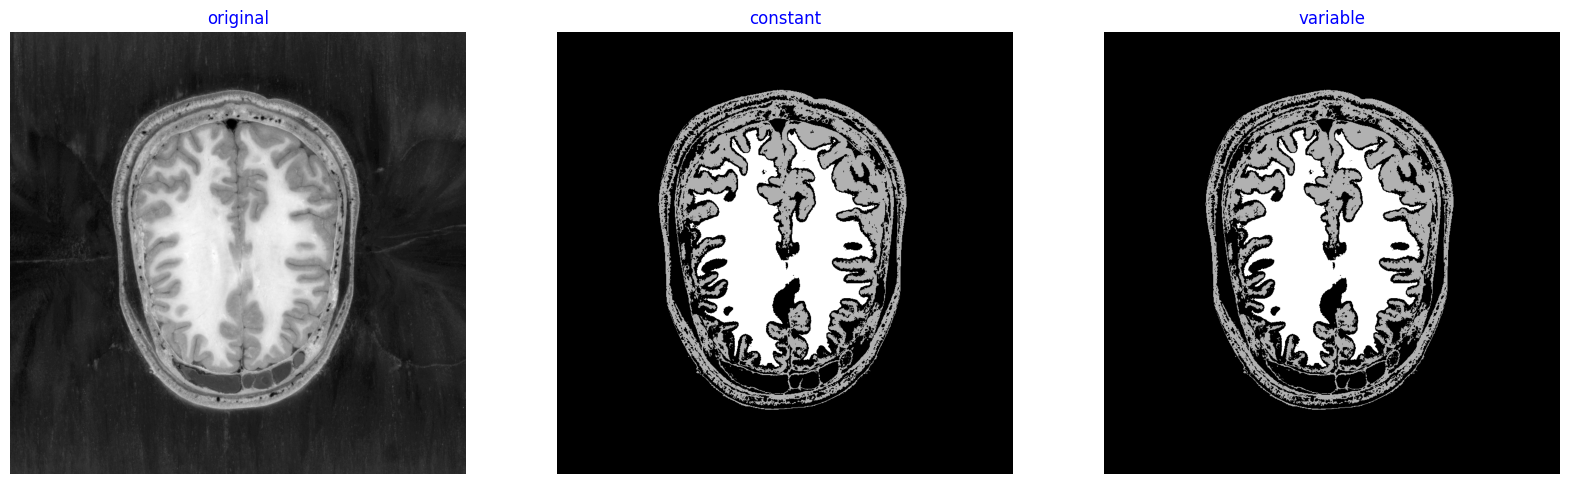

In [22]:
#@title Q8 - Part 8 (15%)
###
show_plots([gray_mri, total_constant, total_variable], ["original", "constant", "variable"])
#علاوه بر قشر خاکستری مغز، بخشهایی از جمجمه که از شدت یکسانی با بخش های خاکستری برخوردار بودند نیز بدست آمدند. جدا از این مشکل، هردوی الگوریتم‌ها به خوبی توانستند سلول‌های سفید را از سلول‌های خاکستری تشخیص بدهند. اما وقتی از میانگین متفاوت استفاده کردیم، این کار را بهتر و در زمان کمتری انجام داد.
###